<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<img src="https://imageio.forbes.com/specials-images/imageserve/5dbb4182d85e3000078fddae/The-9-Biggest-Technology-Trends-That-Will-Transform-Medicine-And-Healthcare-In-2020/960x0.jpg?format=jpg&width=960" width="700">

# Introduction

Medical expenses is one of the major expenses in an individual's life. We know that one's life style and various physiological charactreristics causes diseases or ailments one can have and these ailments influence medical expanses. According to various studies, major factors that contribute to higher expenses in personal medical care include smoking, aging, high BMI. In this study, we aim to find a correlation between personal medical expenses and different factors, and compare them. Then we use the prominent attributes as predictors to predict medical expenses by creating linear regression models.

# Problem Statement

For a health insurance company to make money, it needs to collect more in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population.


The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, depending on the expected treatment costs.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the given CSV file, and view some sample records

medical = pd.read_csv('insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Determining the number of rows and columns
medical.shape

(1338, 7)

In [5]:
medical.describe()  #summary of all the numeric columns in the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medical.info()  #Datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Checking missing values
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* ### No missing values in the dataset

Notice that sex and smoker are categorical features with 2 different values. We convert them to boolean values.
We'll set these values:

Male = 0; Female = 1
Non-somker = 0; Smoker = 1

In [9]:
#Mapping
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(medical.sex.drop_duplicates())
medical.sex = label.transform(medical.sex)
label.fit(medical.smoker.drop_duplicates())
medical.smoker = label.transform(medical.smoker)

## Data Visualization

In [10]:
# Checking the number of unique values is a column

medical.nunique().sort_values()

sex            2
smoker         2
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

### Visualising Numeric Variables

Making a pairplot of all the numeric variables,  to visualise which variables are most correlated to the target variable 'charges'.

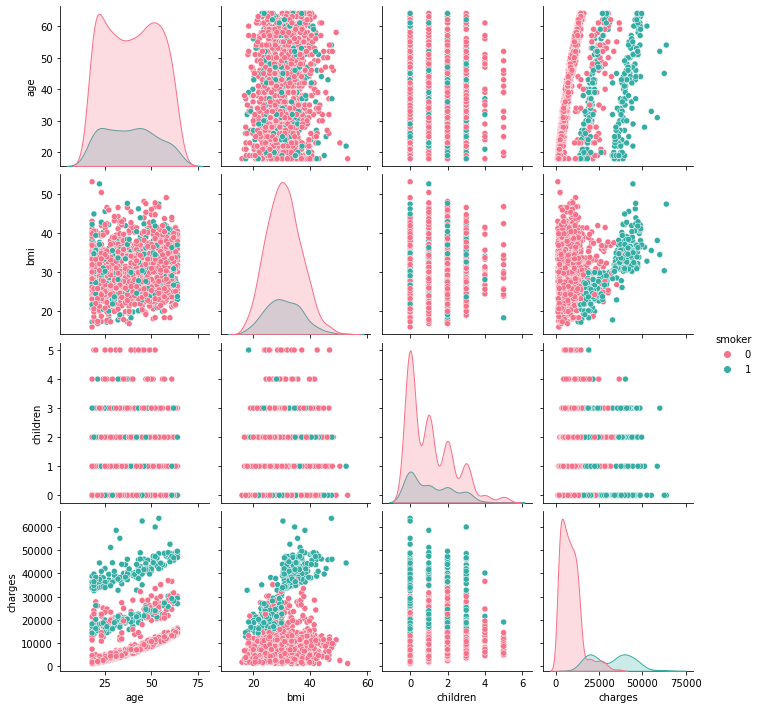

In [11]:
sns.pairplot(medical, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

By analysing all the plots, we can see that,
- A trend of increasing charges can be observed from the age vs charge plot. 
- There also exists a correlation between BMI and charges.
- There seems to be a strong correlation between smoking and medical charges.
- No significant correlation can be observed between no of children and medical charges.
- There is also no correlation between Age and BMI opposing popular belief.

### Visualising Categorical Variables

Let's make a boxplot for all categorical variables to analyse their influence on medical charges.

Text(0.5, 1.0, 'Region vs Charges')

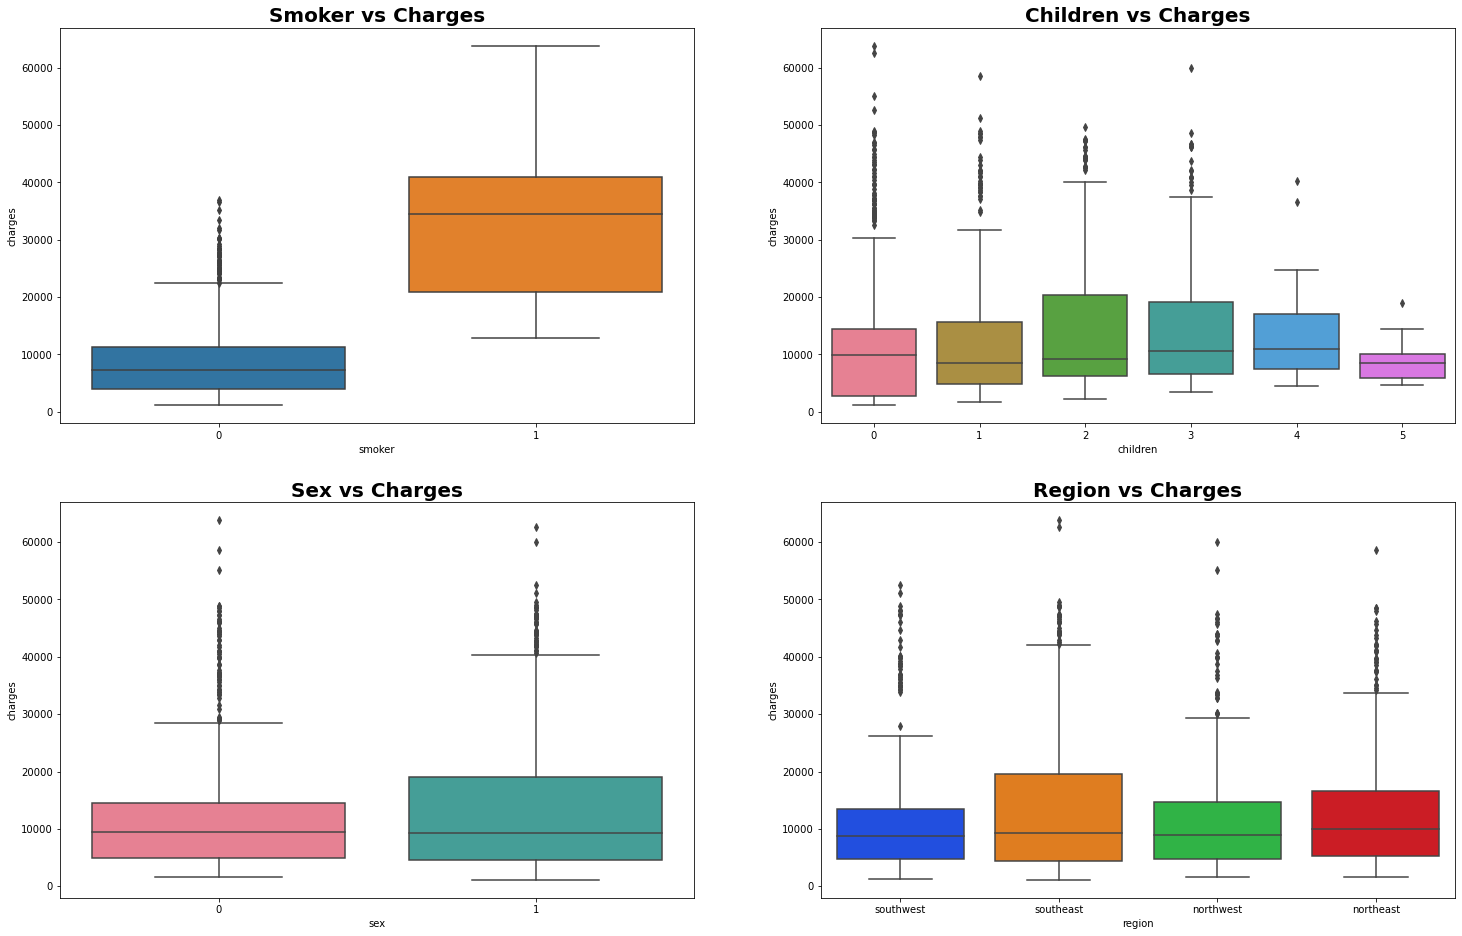

In [12]:
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'smoker', y = 'charges', data = medical)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = medical,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = medical, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = medical,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)

By analysing all the plots above, we can see that,
- Medical charges are higher for a smoker than a non smoker. 
- Medical Charges are more in Southeast Region.
- Medical Charges are more for males than females.
- Medical Charges have some correlation with no of children but it does not imply anything significant as medical charges increase with no of children only till no of childrens get 3.
- Medical Charges for people with no or one child are less compared to people with more than one children.

<AxesSubplot:xlabel='sex', ylabel='count'>

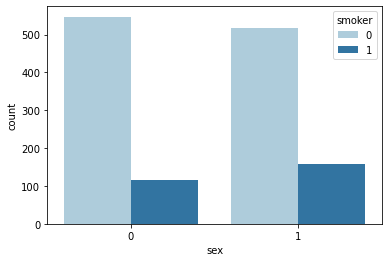

In [13]:
sns.countplot(x='sex', hue='smoker', data=medical, palette='Paired')

The above plot shows that the number and percentage of men who smoke is slightly higher than women. But this difference does not explain the higher medical charges for men as compared to women. This rejects the possibility that medical charges for men were higher due to more men can be smokers. Higher medical charges for men may be due to some other factors.

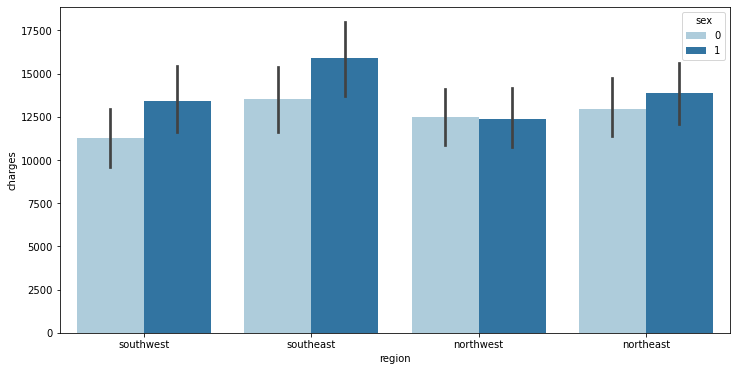

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='sex', data=medical, palette='Paired')
plt.show()

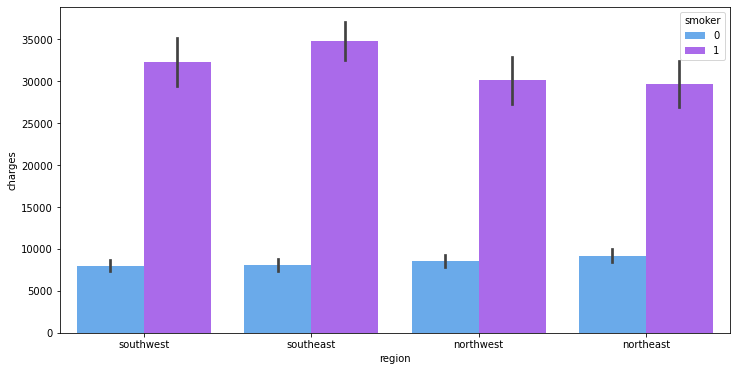

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=medical, palette='cool')
plt.show()

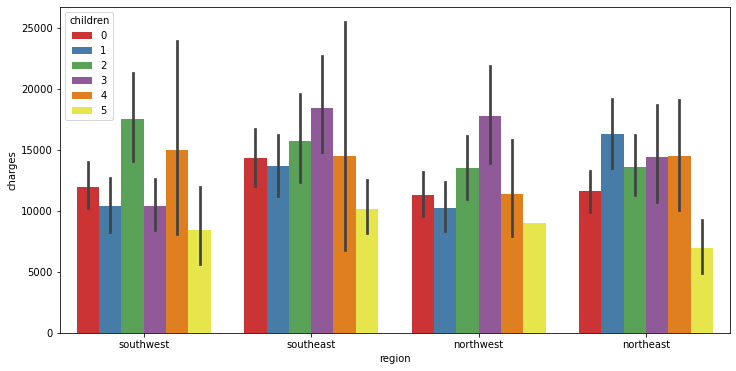

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=medical, palette='Set1')
plt.show()

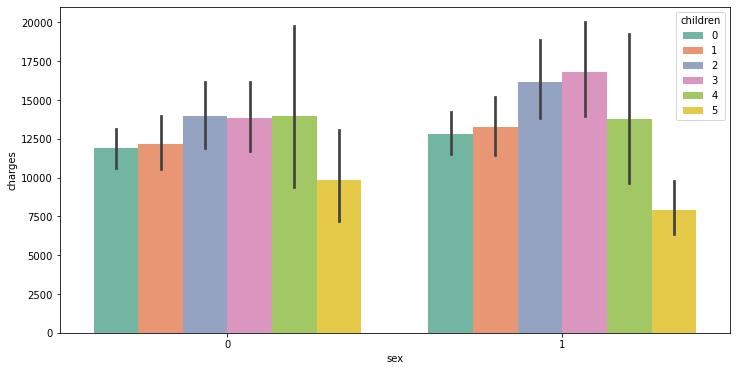

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='charges', hue='children', data=medical, palette='Set2')
plt.show()

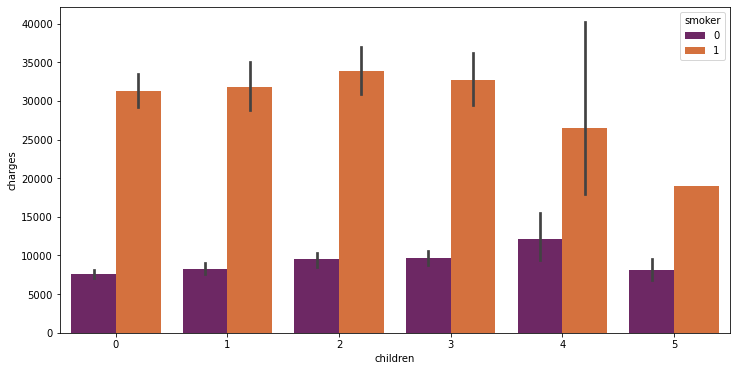

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'children', y = 'charges', data=medical, hue='smoker', palette='inferno')
plt.show()

### 
- We can also see from these barplots that smoking has the highest impact on the medical charges. 
- People who smoke in the northeast generally have higher charges than people who smoke in the other regions.
- people in the Northeast have similar charges for both genders while in other regions men have higher medical charges.
- People with children also have higher medical charges compared to people without children.

In [19]:
medical[medical['sex']==0]['bmi'].mean()

30.377749244713023

In [20]:
medical[medical['sex']==1]['bmi'].mean()

30.943128698224832

BMI of both men and women is very close. 

<AxesSubplot:xlabel='age', ylabel='Density'>

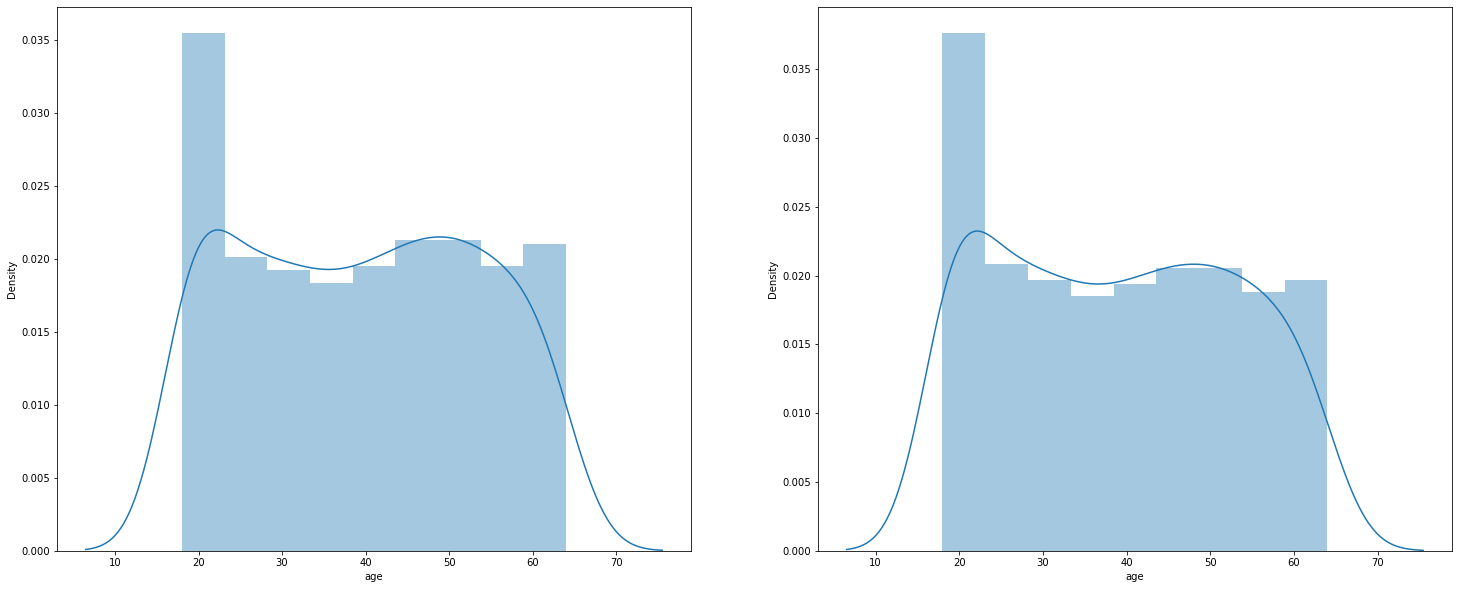

In [21]:
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
sns.distplot(medical[medical['sex']==0]['age'])
plt.subplot(1,2,2)
sns.distplot(medical[medical['sex']==1]['age'])

    Distribution plot of Age parameter for both the genders is very similar.

### Thus the difference in all factors of both genders is not significant to explain higher medical charges for men.

#### Higher medical charges for men are not related to the factors known to us and maybe due to diseases and illnesses caused to them due to exposure to pollution, risk or other factors due to their profression and also due to lifestyle lead by them which may cause some physiological factors which are not recorded in this dataset that lead to certain diseases.

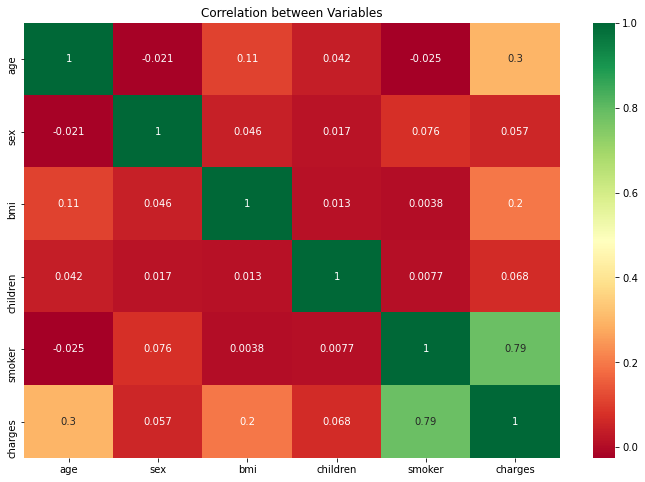

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(medical.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

### Inferences from the above heatmap:
- Smoking has the highest correlation with charges.
- Age and BMI are also correlated with medical charges.

## Data Wrangling

In [23]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [24]:
## Numerical Encoding Region Variable
label.fit(medical.region.drop_duplicates())
medical.region = label.transform(medical.region)

In [25]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [26]:
medical.shape

(1338, 7)

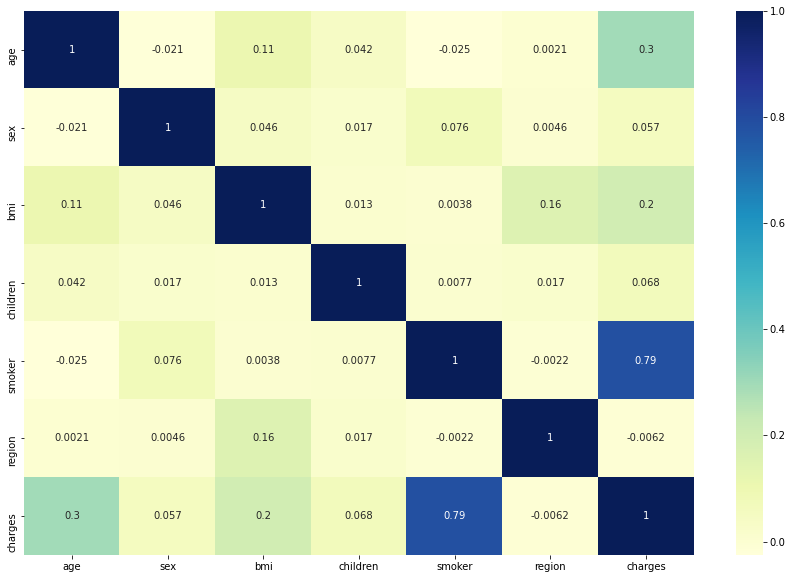

In [27]:
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 10))
sns.heatmap(medical.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Splitting Data into Train and Test Sets

In [28]:
from sklearn.model_selection import train_test_split

medical_train, medical_test = train_test_split(medical, train_size = 0.8,random_state = 100)

In [29]:
print(medical_train.shape)
print(medical_test.shape)

(1070, 7)
(268, 7)


## Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['age','bmi','charges','children','region']

#Fit on data
medical_train[num_vars] = scaler.fit_transform(medical_train[num_vars])
medical_train.head()

,age,sex,bmi,children,smoker,region,charges
1306,0.239130,0,0.158461,0.0,1,0.000000,0.239326
124,0.630435,0,0.483051,0.6,0,0.333333,0.143549
588,0.934783,0,0.536723,0.0,0,0.000000,0.199745
1127,0.369565,0,0.535378,0.4,0,0.666667,0.075255
201,0.652174,0,0.437719,0.2,0,0.666667,0.123694


# Performing Regression Analysis, Feature Selection and Determining influence of selected features on Medical Charges

### Creating Target and Predictor variables

In [32]:
#Divide the data into X and y
y_train = medical_train.pop('charges')
X_train = medical_train

### Building Linear Model

In [35]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

### Using Statsmodel for Detailed Statistics

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [38]:
# Running the linear model 
lm = sm.OLS(y_train,X_train).fit()

In [39]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     499.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.89e-305
Time:                        13:42:08   Log-Likelihood:                 967.59
No. Observations:                1070   AIC:                            -1921.
Df Residuals:                    1063   BIC:                            -1886.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0439      0.010     -4.403      0.0

# Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [40]:
#Drop the constant term B0
X_train= X_train.drop(['const'], axis=1)

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,4.47
0,age,2.83
5,region,2.72
1,sex,1.86
3,children,1.74
4,smoker,1.23


#### Now lets drop the variable sex as it has high p value.

In [42]:
#Drop children_5
X_train_new1 = X_train.drop(["sex"], axis = 1)

In [43]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     599.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.90e-306
Time:                        13:42:31   Log-Likelihood:                 967.59
No. Observations:                1070   AIC:                            -1923.
Df Residuals:                    1064   BIC:                            -1893.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0438      0.010     -4.548      0.0

In [44]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [45]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,4.19
0,age,2.80
4,region,2.71
2,children,1.73
3,smoker,1.22


### Now our model is good with p-values and VIF under the acceptable range

## Residual Analysis of train data

So, now to check if the error terms are also normally distributed (one of the major assumptions of linear regression), let us plot the histogram of the error terms.

In [46]:
X_train_lm1=sm.add_constant(X_train_lm1)
X_train_lm1.head()

,const,age,bmi,children,smoker,region
1306,1.0,0.239130,0.158461,0.0,1,0.000000
124,1.0,0.630435,0.483051,0.6,0,0.333333
588,1.0,0.934783,0.536723,0.0,0,0.000000
1127,1.0,0.369565,0.535378,0.4,0,0.666667
201,1.0,0.652174,0.437719,0.2,0,0.666667


In [47]:
#y train predicted
y_train_pred = lm1.predict(X_train_lm1)

<Figure size 432x288 with 0 Axes>

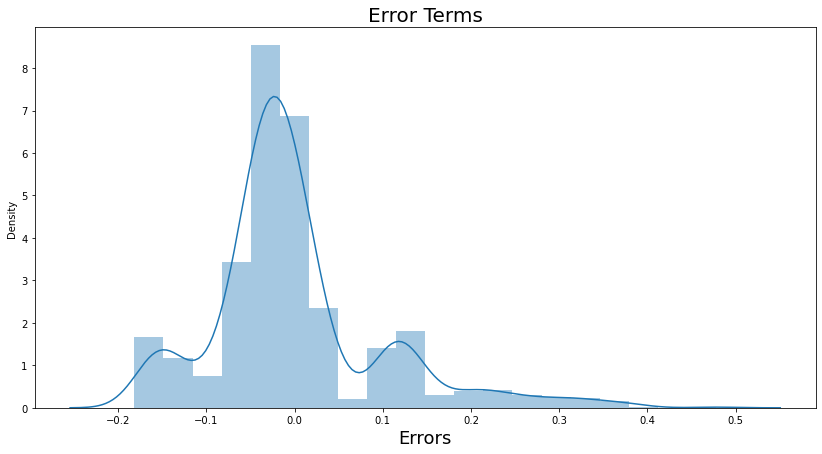

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

#### We can see Error terms are normally distributed

## Making Predictions

#### Performing feature scaling on the test sets

In [49]:
medical_test.head()

,age,sex,bmi,children,smoker,region,charges
12,23,1,34.400,0,0,3,1826.84300
306,28,0,27.500,2,0,3,20177.67113
318,44,0,27.645,0,0,1,7421.19455
815,20,0,31.460,0,0,2,1877.92940
157,18,1,25.175,0,1,0,15518.18025


In [50]:
#Create a list of numeric variables
num_vars=num_vars=['age','bmi','charges','children','region']

#Fit on data
medical_test[num_vars] = scaler.fit_transform(medical_test[num_vars])
medical_test.head()

,age,sex,bmi,children,smoker,region,charges
12,0.108696,1,0.545356,0.0,0,1.000000,0.011807
306,0.217391,0,0.331369,0.4,0,1.000000,0.323420
318,0.565217,0,0.335866,0.0,0,0.333333,0.106804
815,0.043478,0,0.454179,0.0,0,0.666667,0.012675
157,0.000000,1,0.259265,0.0,1,0.000000,0.244298


#### Dividing Test set into Predictor and Target variables

In [51]:
#Dividing into X_test and y_test
y_test = medical_test.pop('charges')
X_test = medical_test
X_test.describe()

,age,sex,bmi,children,smoker,region
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.468202,0.544776,0.424763,0.223881,0.235075,0.487562
std,0.301745,0.498923,0.181210,0.253272,0.424839,0.377602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.294619,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.418980,0.200000,0.000000,0.500000
75%,0.722826,1.000000,0.527369,0.400000,0.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X_train_new1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,age,bmi,children,smoker,region
12,1.0,0.108696,0.545356,0.0,0,1.000000
306,1.0,0.217391,0.331369,0.4,0,1.000000
318,1.0,0.565217,0.335866,0.0,0,0.333333
815,1.0,0.043478,0.454179,0.0,0,0.666667
157,1.0,0.000000,0.259265,0.0,1,0.000000


In [54]:
# Making predictions
y_pred = lm1.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [55]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7882333195590867

In [56]:
#Adjusted R^2

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]


Adj_r2=1-(1-0.75783003115855)*(n-1)/(n-p-1)
print(Adj_r2)

0.7522629054380569


## Model Evaluation

<Figure size 432x288 with 0 Axes>

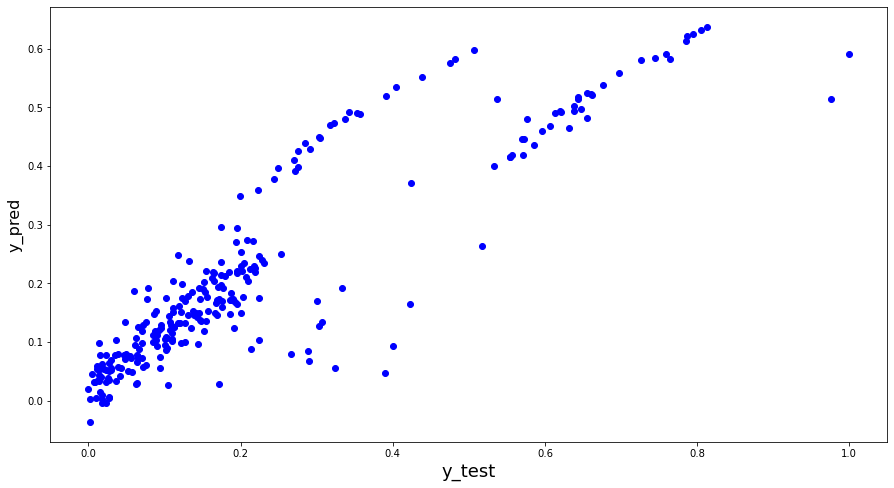

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     # Y-label
plt.show()

#### Visualising the fit on the test set

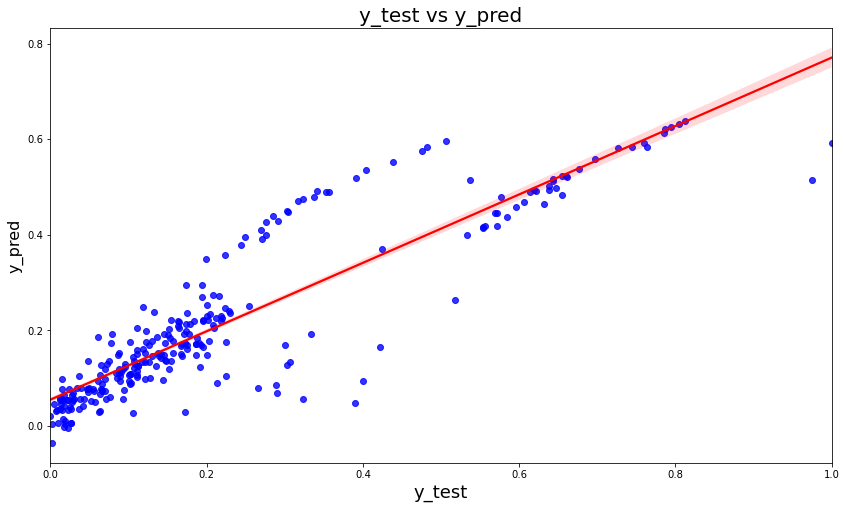

In [58]:
#Regression plot
plt.figure(figsize=(14,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Final Result Comparison between Train model and Test: 

* Train R^2 :  0.738

* Train Adjusted R^2 : 0.737

* Test R^2: 0.788

* Test Adjusted R^2: 0.752

* Difference in R^2 between train and test: 5%

* Difference in adjusted R^2 between Train and test: 1.5% 

## We can see that the equation of our best fitted line is:

### $ charges=         0.3748\times smoker+ 0.1939   \times Age+ 0.1832 \times bmi+ 0.0379 \times children-0.0184 \times region -0.0438 $

# Making Prediction using Various Regression Algorithms

### Creating Target and Predictor variables

In [59]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['age','bmi','charges','children','region']

#Fit on data
medical[num_vars] = scaler.fit_transform(medical[num_vars])
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,1.000000,0.251611
1,0.000000,1,0.479150,0.2,0,0.666667,0.009636
2,0.217391,1,0.458434,0.6,0,0.666667,0.053115
3,0.326087,1,0.181464,0.0,0,0.333333,0.333010
4,0.304348,1,0.347592,0.0,0,0.333333,0.043816


In [60]:
Y=medical.pop('charges')
X=medical

In [61]:
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0.0,1,1.000000
1,0.000000,1,0.479150,0.2,0,0.666667
2,0.217391,1,0.458434,0.6,0,0.666667
3,0.326087,1,0.181464,0.0,0,0.333333
4,0.304348,1,0.347592,0.0,0,0.333333


In [62]:
Y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

### Splitting data into train and test sets

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

### Training model with regression algorithms and hyperparameter tuning using GridSearchCV

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [65]:
Lin_reg = LinearRegression()

In [66]:
Lin_reg.fit(X_train,Y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test,Y_test))

-0.04893626167647619
[ 0.18456734 -0.0005656   0.19624394  0.04701295  0.38158846 -0.01549729]
0.7445422986536502


## Ridge Regression

In [67]:
Ridge=Ridge()

In [68]:
Ridge.fit(X_train, Y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, Y_test))

-0.045413372571244115
[ 1.83008185e-01 -2.68916303e-04  1.89501107e-01  4.63446485e-02
  3.79358075e-01 -1.48397666e-02]
0.744436756334857


## Lasso Regression

In [69]:
Lasso=Lasso()

In [73]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, Y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, Y_test))

0.19558982293775568
[0. 0. 0. 0. 0. 0.]
-0.001825328970232576


## ElasticNet Regression

In [74]:
ElasticNet=ElasticNet()

In [75]:
ElasticNet.fit(X_train, Y_train)
print(ElasticNet.intercept_)
print(ElasticNet.coef_)
print(ElasticNet.score(X_test, Y_test))

0.19558982293775568
[0. 0. 0. 0. 0. 0.]
-0.001825328970232576


## Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 200, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,Y_train)
X_train_pred = Rfr.predict(X_train)
X_test_pred = Rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(X_train_pred, Y_train),
       metrics.mean_squared_error(X_test_pred, Y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(X_train_pred, Y_train),
       metrics.r2_score(X_test_pred, Y_test)))

MSE train data: 0.001, MSE test data: 0.006
R2 train data: 0.976, R2 test data: 0.805


In [77]:
import xgboost
regressor=xgboost.XGBRegressor()

In [78]:
regressor=xgboost.XGBRegressor()

In [79]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [80]:
Y_train_pred=regressor.predict(X_train)
Y_test_pred=regressor.predict(X_test)

In [81]:
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(Y_train_pred, Y_train),
       metrics.r2_score(Y_test_pred, Y_test)))

R2 train data: 0.996, R2 test data: 0.797


## Polynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures (degree = 2)
X_pol = pol.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_pol, Y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(X_train, Y_train)
y_train_pred = Pol_reg.predict(X_train)
y_test_pred = Pol_reg.predict(X_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(X_test, Y_test))

0.01217993275424245
[ 4.74858403e-15  5.37522430e-02 -7.29662280e-03  1.86955305e-01
  1.12762979e-01  2.59581296e-02 -2.32915679e-02  1.01901300e-01
  1.40112720e-02  3.62973305e-02  7.08923539e-03  2.66074242e-03
  3.73499697e-02 -7.29662280e-03  1.06998338e-02 -2.90983594e-02
 -8.83776627e-03  1.17967499e-02 -1.97820943e-01  4.66521266e-02
  8.40838809e-01 -7.83990499e-02 -4.53161229e-02 -3.38180190e-02
 -5.47727918e-02  2.59581296e-02  1.43226280e-02  1.93707111e-02]
0.8813175103251999


In [83]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

Mean Absolute Error: 0.04650133397104678
Mean Squared Error: 0.004811899007461038
Root Mean Squared Error: 0.06936785283876847


In [84]:
##Predicting the charges
y_test_pred = Pol_reg.predict(X_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,0.137316,0.174345
610,0.118531,0.144144
569,0.711591,0.759865
1034,0.188802,0.211885
198,0.136035,0.116386
...,...,...
1084,0.221839,0.249902
726,0.088475,0.117920
1132,0.312651,0.193058
725,0.635458,0.658058
